In [32]:
# Linear discriminant analysis

https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation

In [14]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("Occupancy_Estimation.csv")

In [16]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [18]:
# Assume target column is 'Occupancy' and other columns are features
X = data.drop('Room_Occupancy_Count', axis=1)
y = data['Room_Occupancy_Count']

In [20]:
#Drop classes which are not linearly separable (if applicable)
y = y[y.isin([0, 1, 2])]  # Assuming 0, 1, 2 are linearly separable

In [22]:
# Drop non-numeric columns
X = X.select_dtypes(include=['float64', 'int64'])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
print(len(X_scaled), len(y))


10129 9435


In [26]:
print(X.isnull().sum())
print(y.isnull().sum())


S1_Temp         0
S2_Temp         0
S3_Temp         0
S4_Temp         0
S1_Light        0
S2_Light        0
S3_Light        0
S4_Light        0
S1_Sound        0
S2_Sound        0
S3_Sound        0
S4_Sound        0
S5_CO2          0
S5_CO2_Slope    0
S6_PIR          0
S7_PIR          0
dtype: int64
0


In [27]:
# Align X and y before splitting
X = X.iloc[:len(y)]
X_scaled = scaler.fit_transform(X)


In [28]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

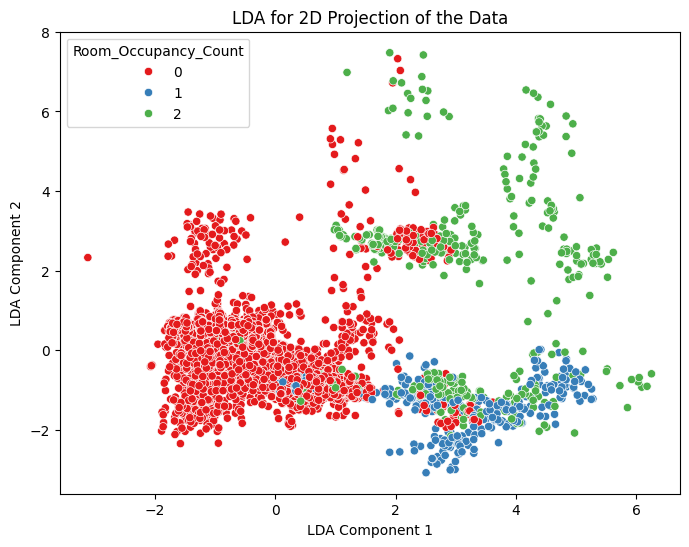

In [30]:
# Visualize the LDA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_train, palette='Set1')
plt.title("LDA for 2D Projection of the Data")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()

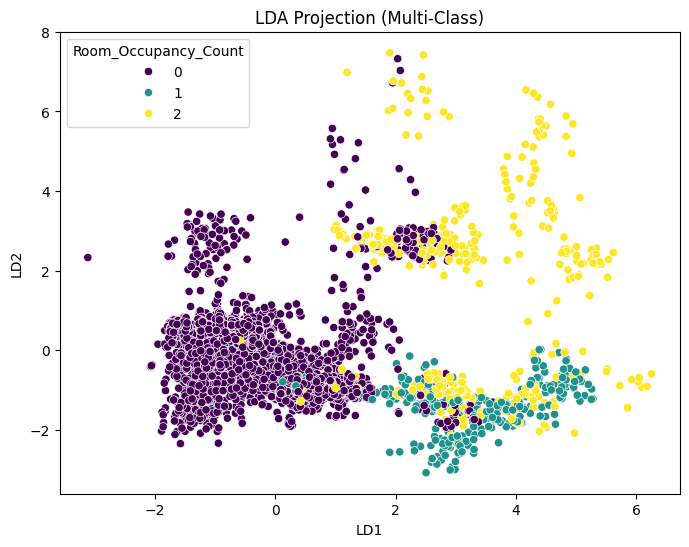

In [34]:
# Use filtered data (classes 0, 1, 2)
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA for multi-class (n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# Plot LDA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_train, palette='viridis')
plt.title('LDA Projection (Multi-Class)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

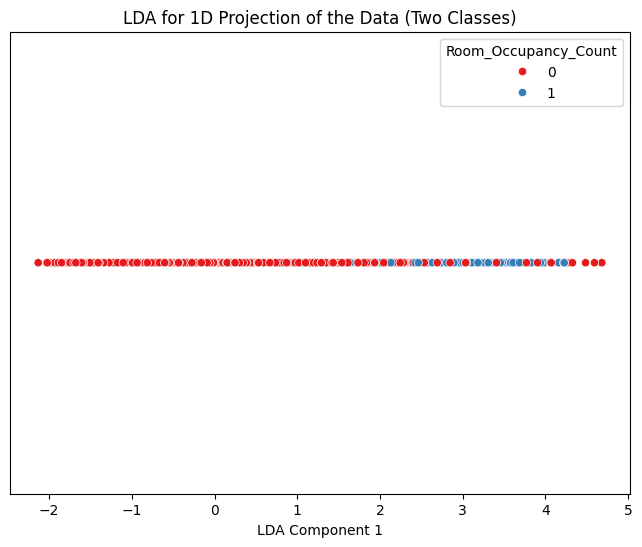

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Occupancy_Estimation.csv")

# Assume target column is 'Room_Occupancy_Count' and other columns are features
X = data.drop('Room_Occupancy_Count', axis=1)
y = data['Room_Occupancy_Count']

# Modified for Two Classes:
y = y[y.isin([0, 1])]  # Selecting only classes 0 and 1

# Drop non-numeric columns
X = X.select_dtypes(include=['float64', 'int64'])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Align X and y before splitting
X = X.iloc[:len(y)]
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LDA for dimensionality reduction (n_components=1 for two classes)
lda = LinearDiscriminantAnalysis(n_components=1) 
X_lda = lda.fit_transform(X_train, y_train)

# Visualize the LDA results (for two classes, it's a 1D projection)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda.reshape(-1), y=[0] * len(X_lda), hue=y_train, palette='Set1') 
plt.title("LDA for 1D Projection of the Data (Two Classes)")
plt.xlabel("LDA Component 1")
plt.yticks([])  # Hiding y-axis ticks
plt.show()